# Formatting axis labels
### Axis and ticks 
In Matplotlib, each axes has attributes xaxis and yaxis. The ticks are contained in Axes instance, just like Axes are contained in Figures
- Each axes has attributes xaxis and yaxis
- Each axes manage major tick and minor tick, minor ticks are not used by default unless in logscale plot
- formatter comes behind ticks: an axis can have ticks but no format, but not the other way. Setting locator to NullLocator also remove any Formatting

##### Logscale
Logscale can be specified by when instantizing the axes: `plt.axes(xscale='log', yscale='log')`

##### Setting the ticks and formats
We customize the ticks and formats by specifing the formatter and locator for the major and minor ticks:
- ax.xaxis.get_major_locator()
- ax.xaxis.get_major_formatter()
- ax.yaxis.set_major_locator(plt.NullLocator())
- ax.xaxis.set_major_formatter(plt.NullFormatter())

##### A list of formatter and locator
```
Locator                    Descriptions   
https://matplotlib.org/stable/gallery/ticks/tick-locators.html?highlight=fixedlocator
NullLocator                No ticks
FixedLocator               Tick locations are fixed
IndexLocator               Locator for index plots (e.g., where x = range(len(y)))
LinearLocator              Evenly spaced ticks from min to max
LogLocator                 Logarithmically ticks from min to max
MultipleLocator            Ticks and range are a multiple of base
MaxNLocator(N)             Finds up to a max number of ticks at nice locations
AutoLocator                (Default) MaxNLocatorwith simple defaults
AutoMinorLocator           Locator for minor ticks

Formatter                 
https://matplotlib.org/stable/gallery/ticks/tick-formatters.html?highlight=fixedlocator
NullFormatter              No labels
IndexFormatter             Set strings from a list of labels
FixedFormatter             Set strings manually for labels
FuncFormatter              Use user-defined function to set value
FormatStrFormatter         Use a format string for each value
ScalarFormatter            Default for scalar values
LogFormatter               Default for log axes
```


# Multiplots in two ways
There are two ways to create a multiplot using Matplotlib. The first one is automatic and the second one is manual. Automatic process is good if you want to make a quick plot, but automatic mode does not often treat correctly across different side of the figure. For example, automatic mode will work well if the figure size is also determined, but for other size, the different figures will have strange separations. Therefore, I always suggest to use the manual mode to plot multiplot figures for publication. 

### Adding axes manually
To create a multiplot, we typically need to specify first the width and height of the figure, using the `figsize` parameter when creating the figures (`plt.figure(figsize=(5,7))`). Often journals gave requirement for the width of the figure, but the height/width ratio typically need some adjustment, depending what you want to show (trial and error). 

Remember that axis are the object that contain a single plot. So to make multiplot, we need to add multiple axes and we gave specific position of the axes, using the `fig.add_axes()` as documented [here](https://matplotlib.org/stable/api/figure_api.html?highlight=figure#matplotlib.figure.Figure.add_axes). As given in the documentation, we define the axes position using the parameter `rect = [left, bottom, width, height]`. These values are the ratio in terms of the whole plot. In this example, I created two axes, with position:
```python
axs1 = fig.add_axes([0.15, 0.10, 0.8, 0.4])
axs2 = fig.add_axes([0.15, 0.52, 0.8, 0.4])
```
we see that the left position and width are the same so that figure aligns perfectly. For the vertical position, the lower figure start from 0.1 with height 0.4, so that the lower figure finishes at vertical position of 0.5. The second figure begin at vertical position of 0.52 and has the same height.

When making the individual plots, we can treat them just as normal axis objects: we can add labels to each axis, change the range and so on. Each axis that contain data are independent.

### Formatting ticks
When making multiplots (and other times). it is sometimes necessary that we specify the format of tics. For example, 

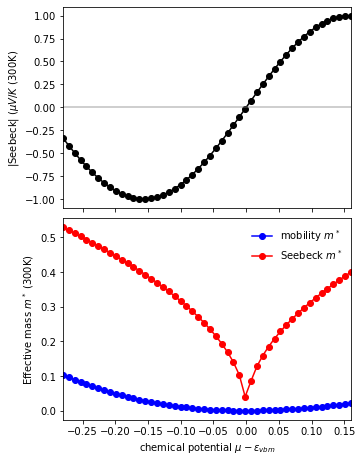

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-0.28, 0.16)
y1 = np.exp(-1 * x) * x**2
y2 = np.abs(x) ** 0.5
y3 = np.sin(x * 10)

fig = plt.figure(figsize=(5,7))
axs1 = fig.add_axes([0.15, 0.1, 0.8, 0.4])

xlim = (-0.28, 0.16)

axs1.set_xlim(*xlim)
axs1.set_xlabel(r"chemical potential $\mu - \varepsilon_{vbm}$")
axs1.set_ylabel(r"Effective mass $m^*$ (300K)")

axs1.plot(x, y1, "o-", label = "mobility $m^*$", color = "blue")
axs1.plot(x, y2, "o-", label = "Seebeck $m^*$", color = "red")

axs1.legend(frameon = False)

axs2 = fig.add_axes([0.15, 0.52, 0.8, 0.4])
axs2.set_xlim(*xlim)
axs2.xaxis.set_major_formatter(plt.NullFormatter())
axs2.set_ylabel(r"|Seebeck| ($\mu V/K$ (300K)")
axs2.plot(x, y3, "o-", label = "Seebeck", color = "black")
axs2.plot(xlim, (0,0), "-", color = "gray", alpha = 0.5)
fig.savefig("calculated_effective_mass.pdf")